<a href="https://colab.research.google.com/github/sabaakram539/Bengaluru_House_Prediction/blob/main/Bengaluru_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problem Statement**

In this project we are going to find the price of the Bengaluru houses based on their features like 'area_type', location, size, etc. The data has been downloaded from the kaggle.com. Let's dig in.

# **2. Data Understanding**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

>> ## **Importing the Dataset**

In [2]:
house=pd.read_csv("Bengaluru_House_Data.csv")
house.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
house.shape

(13320, 9)

>> ## **Data Preprocessing and cleaning**

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
house.drop(columns=['society','balcony'],inplace=True)

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   price         13320 non-null  float64
dtypes: float64(2), object(5)
memory usage: 728.6+ KB


In [7]:
house.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
house['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
17-Jan               1
15-Aug               1
16-Oct               1
16-Nov               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [9]:
availability_count=house['availability'].value_counts()
availability_count

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
17-Jan               1
15-Aug               1
16-Oct               1
16-Nov               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [10]:
availability_count.value_counts()

1        10
2         7
6         5
4         4
3         4
12        4
11        3
5         3
7         3
16        3
39        2
21        2
9         2
8         2
18        1
13        1
14        1
271       1
15        1
17        1
131       1
10        1
143       1
19        1
29        1
99        1
98        1
93        1
88        1
10581     1
200       1
62        1
185       1
307       1
47        1
43        1
41        1
40        1
295       1
36        1
24        1
Name: availability, dtype: int64

In [11]:
availability_count_less_10=availability_count[availability_count<=10]

availability_count_greater_10=availability_count[availability_count>10]
availability_count_10_20=availability_count_greater_10[availability_count_greater_10<=20]

availability_count_greater_20=availability_count[availability_count>20]
availability_count_20_30=availability_count_greater_20[availability_count_greater_20<=30]

availability_count_greater_30=availability_count[availability_count>30]
availability_count_30_40=availability_count_greater_30[availability_count_greater_30<=40]

availability_count_greater_40=availability_count[availability_count>40]
availability_count_40_50=availability_count_greater_40[availability_count_greater_40<=50]

availability_count_greater_50=availability_count[availability_count>50]
availability_count_50_60=availability_count_greater_50[availability_count_greater_50<=60]

availability_count_greater_60=availability_count[availability_count>60]
availability_count_60_70=availability_count_greater_60[availability_count_greater_60<=70]

availability_count_greater_70=availability_count[availability_count>70]
availability_count_70_80=availability_count_greater_70[availability_count_greater_70<=80]

availability_count_greater_80=availability_count[availability_count>80]
availability_count_80_90=availability_count_greater_80[availability_count_greater_80<=90]

availability_count_greater_90=availability_count[availability_count>90]
availability_count_90_100=availability_count_greater_90[availability_count_greater_90<=100]

In [12]:
house['availability']=house['availability'].apply(lambda x: "availability_count_less_10" if x in availability_count_less_10 else x)
house['availability']=house['availability'].apply(lambda x: "availability_count_10_20" if x in availability_count_10_20 else x)
house['availability']=house['availability'].apply(lambda x: "availability_count_20_30" if x in availability_count_20_30 else x)
house['availability']=house['availability'].apply(lambda x: "availability_count_30_40" if x in availability_count_30_40 else x)
house['availability']=house['availability'].apply(lambda x: "availability_count_40_50" if x in availability_count_40_50 else x)
house['availability']=house['availability'].apply(lambda x: "availability_count_50_60" if x in availability_count_50_60 else x)
house['availability']=house['availability'].apply(lambda x: "availability_count_60_70" if x in availability_count_60_70 else x)
house['availability']=house['availability'].apply(lambda x: "availability_count_70_80" if x in availability_count_70_80 else x)
house['availability']=house['availability'].apply(lambda x: "availability_count_80_90" if x in availability_count_80_90 else x)
house['availability']=house['availability'].apply(lambda x: "availability_count_90_100" if x in availability_count_90_100 else x)

In [13]:
house['location'].value_counts()

Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Ckikkakammana Halli          1
Nagarbhavi  BDA Complex      1
Popular Colony               1
KHB Colony Extension         1
Jakkasandra                  1
Name: location, Length: 1305, dtype: int64

In [14]:
house['location']=house['location'].str.strip()

In [15]:
location_count=house['location'].value_counts()

In [16]:
location_count_less_10=location_count[location_count<=10]

In [17]:
house['location']=house['location'].apply(lambda x: "Others" if x in location_count_less_10 else x)

In [18]:
house['location']=house['location'].fillna("Others")

In [19]:
house['location'].value_counts()

Others                2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Banjara Layout          11
Kodigehalli             11
HAL 2nd Stage           11
Marsur                  11
Pattandur Agrahara      11
Name: location, Length: 242, dtype: int64

In [20]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13304 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   price         13320 non-null  float64
dtypes: float64(2), object(5)
memory usage: 728.6+ KB


In [21]:
house['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
43 Bedroom       1
27 BHK           1
16 BHK           1
18 Bedroom       1
12 Bedroom       1
19 BHK           1
13 BHK           1
14 BHK           1
Name: size, dtype: int64

In [22]:
house['size']=house['size'].fillna("2 BHK")

In [23]:
house['BHK']=house['size'].str.split().str.get(0).astype(int)

In [24]:
house.drop(columns=['size'],inplace=True)

In [25]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   total_sqft    13320 non-null  object 
 4   bath          13247 non-null  float64
 5   price         13320 non-null  float64
 6   BHK           13320 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 728.6+ KB


In [26]:
house['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
def sqft(x):
  temp=x.split('-')
  if len(temp)==2:
    return (float(temp[0])+float(temp[1]))/2
  try:
    return float(x)
  except:
    return None

In [28]:
house['total_sqft']=house['total_sqft'].apply(sqft)

In [29]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   total_sqft    13274 non-null  float64
 4   bath          13247 non-null  float64
 5   price         13320 non-null  float64
 6   BHK           13320 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 728.6+ KB


In [30]:
house['price_per_sqft']=house['price']*100000/house['total_sqft']

In [31]:
house.head()

,area_type,availability,location,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,51.00,2,4250.000000


>> ## **Outlier Detection and Removal**

In [32]:
house.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13247.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.692610,112.565627,2.802778,7.907501e+03
std,1238.405258,1.341458,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07



1.   **total_sqft :** 
Minimum total_sqft is 1, while despite 75th percentile is 1680, we have maximum 52272.
2.   **bath :** 
Maximum number of bathrooms is 40.
3. **BHK :** 
maximum BHK is 43.
4. **price_per_sqft :** 
While 75th percentile of the value is less than 7311, we have maximum 12000000.



>> **BHK/Bath ratio**

In [33]:
house['bhk_bath_ratio']=house['BHK']/house['bath']

In [34]:
house[house['bhk_bath_ratio']<1]

,area_type,availability,location,total_sqft,bath,price,BHK,price_per_sqft,bhk_bath_ratio
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,120.0,4,4615.384615,0.800000
11,Plot Area,Ready To Move,Whitefield,2785.0,5.0,295.0,4,10592.459605,0.800000
18,Super built-up Area,Ready To Move,Others,2770.0,4.0,290.0,3,10469.314079,0.750000
22,Plot Area,Ready To Move,Thanisandra,2800.0,5.0,380.0,4,13571.428571,0.800000
45,Plot Area,Ready To Move,HSR Layout,600.0,9.0,200.0,8,33333.333333,0.888889
...,...,...,...,...,...,...,...,...,...
13299,Super built-up Area,18-Dec,Whitefield,2856.0,5.0,154.5,4,5409.663866,0.800000
13300,Plot Area,Ready To Move,Hosakerehalli,1500.0,6.0,145.0,5,9666.666667,0.833333
13306,Plot Area,Ready To Move,Others,1200.0,5.0,325.0,4,27083.333333,0.800000
13311,Plot Area,Ready To Move,Ramamurthy Nagar,1500.0,9.0,250.0,7,16666.666667,0.777778


In [35]:
house=house[house['bhk_bath_ratio']>=1]

In [36]:
house.describe()

,total_sqft,bath,price,BHK,price_per_sqft,bhk_bath_ratio
count,12301.000000,12341.000000,12341.000000,12341.000000,1.230100e+04,12341.000000
mean,1479.006097,2.533506,100.730374,2.740297,7.765887e+03,1.097183
std,1179.415970,1.169348,120.876104,1.266533,1.105451e+05,0.224683
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02,1.000000
25%,1096.000000,2.000000,48.750000,2.000000,4.203284e+03,1.000000
50%,1251.000000,2.000000,69.000000,3.000000,5.297297e+03,1.000000
75%,1600.000000,3.000000,109.000000,3.000000,7.000000e+03,1.000000
max,52272.000000,40.000000,2800.000000,43.000000,1.200000e+07,4.000000


>> **total_sqft_bhk ratio**

In [37]:
house['total_sqft_bhk_ratio']=house['total_sqft']/house['BHK']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
house[house['total_sqft_bhk_ratio']<=200]

,area_type,availability,location,total_sqft,bath,price,BHK,price_per_sqft,bhk_bath_ratio,total_sqft_bhk_ratio
9,Plot Area,Ready To Move,Others,1020.0,6.0,370.0,6,36274.509804,1.000000,170.000000
68,Plot Area,Ready To Move,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296,1.142857,168.750000
70,Plot Area,Ready To Move,Others,500.0,3.0,100.0,3,20000.000000,1.000000,166.666667
89,Plot Area,Ready To Move,Rajaji Nagar,710.0,6.0,160.0,6,22535.211268,1.000000,118.333333
129,Plot Area,Ready To Move,Vishwapriya Layout,950.0,7.0,115.0,7,12105.263158,1.000000,135.714286
...,...,...,...,...,...,...,...,...,...,...
13217,Plot Area,Ready To Move,Others,1200.0,3.0,125.0,6,10416.666667,2.000000,200.000000
13221,Plot Area,Ready To Move,Others,1178.0,9.0,75.0,9,6366.723260,1.000000,130.888889
13277,Plot Area,Ready To Move,Others,1400.0,7.0,218.0,7,15571.428571,1.000000,200.000000
13279,Plot Area,Ready To Move,Others,1200.0,5.0,130.0,6,10833.333333,1.200000,200.000000


In [39]:
house=house[house['total_sqft_bhk_ratio']>200]

In [40]:
house.drop(columns=['bhk_bath_ratio',"total_sqft_bhk_ratio"],inplace=True)

In [41]:
house.head()

,area_type,availability,location,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,1170.0,2.0,38.00,2,3247.863248


>> **bath**

In [42]:
house.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,11908.000000,11908.000000,11908.000000,11908.000000,11908.000000
mean,1498.849681,2.444491,99.712878,2.633188,6196.194033
std,1192.083535,0.955915,122.059032,1.016442,4031.582016
min,284.000000,1.000000,8.000000,1.000000,267.829813
25%,1100.000000,2.000000,48.000000,2.000000,4181.818182
50%,1262.000000,2.000000,67.755000,2.000000,5217.391304
75%,1608.000000,3.000000,105.000000,3.000000,6770.833333
max,52272.000000,27.000000,2800.000000,27.000000,176470.588235


In [43]:
house[house['bath']>10]

,area_type,availability,location,total_sqft,bath,price,BHK,price_per_sqft
1718,Super built-up Area,Ready To Move,Others,8000.0,27.0,230.0,27,2875.000000
3609,Super built-up Area,Ready To Move,Others,10000.0,16.0,550.0,16,5500.000000
9935,Super built-up Area,Ready To Move,Others,5425.0,13.0,275.0,13,5069.124424


In [44]:
house=house[house['bath']<=10]

>> **BHK**

In [45]:
house.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,11905.000000,11905.000000,11905.000000,11905.000000,11905.000000
mean,1497.259723,2.440403,99.649387,2.629147,6196.626159
std,1187.645708,0.915718,121.988188,0.979532,4031.956785
min,284.000000,1.000000,8.000000,1.000000,267.829813
25%,1100.000000,2.000000,48.000000,2.000000,4181.818182
50%,1262.000000,2.000000,67.750000,2.000000,5217.391304
75%,1607.000000,3.000000,105.000000,3.000000,6770.833333
max,52272.000000,10.000000,2800.000000,11.000000,176470.588235


In [46]:
house[house['BHK']>9]

,area_type,availability,location,total_sqft,bath,price,BHK,price_per_sqft
459,Super built-up Area,Ready To Move,Others,5000.0,9.0,360.0,11,7200.000000
4691,Plot Area,Ready To Move,Others,2416.0,10.0,600.0,10,24834.437086
9769,Plot Area,Ready To Move,Others,3300.0,9.0,450.0,10,13636.363636
11142,Built-up Area,Ready To Move,Munnekollal,7200.0,10.0,200.0,10,2777.777778
11327,Plot Area,Ready To Move,Kogilu,3280.0,9.0,450.0,10,13719.512195


In [47]:
house=house[house['BHK']<=9]

>> **total_sqft_bhk ratio**

In [48]:
house.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000
mean,1496.107647,2.437479,99.518147,2.625966,6194.005574
std,1186.051570,0.904671,121.816010,0.967328,4027.881824
min,284.000000,1.000000,8.000000,1.000000,267.829813
25%,1100.000000,2.000000,48.000000,2.000000,4181.818182
50%,1262.000000,2.000000,67.600000,2.000000,5217.391304
75%,1605.000000,3.000000,105.000000,3.000000,6769.425450
max,52272.000000,9.000000,2800.000000,9.000000,176470.588235


>> **total_sqft**

In [49]:
house[house['total_sqft']>8000]

,area_type,availability,location,total_sqft,bath,price,BHK,price_per_sqft
408,Super built-up Area,availability_count_30_40,Rajaji Nagar,12000.0,6.0,2200.0,7,18333.333333
440,Plot Area,Ready To Move,Whitefield,11890.0,4.0,700.0,4,5887.300252
514,Plot Area,Ready To Move,Banashankari Stage III,8500.0,4.0,145.0,4,1705.882353
605,Super built-up Area,availability_count_30_40,Malleshwaram,12000.0,7.0,2200.0,7,18333.333333
674,Built-up Area,Ready To Move,Yelahanka,35000.0,3.0,130.0,3,371.428571
810,Plot Area,18-Apr,Others,10961.0,4.0,80.0,4,729.860414
1234,Plot Area,Ready To Move,Others,14000.0,3.0,800.0,4,5714.285714
1894,Plot Area,Ready To Move,Others,52272.0,2.0,140.0,3,267.829813
2108,Plot Area,Ready To Move,Kothanur,9600.0,5.0,550.0,5,5729.166667
2623,Plot Area,18-Jul,Others,30000.0,4.0,2100.0,4,7000.000000


In [50]:
house[house['total_sqft']>8000].shape

(27, 8)

In [51]:
house=house[house['total_sqft']<=8000]

In [52]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11873 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       11873 non-null  object 
 1   availability    11873 non-null  object 
 2   location        11873 non-null  object 
 3   total_sqft      11873 non-null  float64
 4   bath            11873 non-null  float64
 5   price           11873 non-null  float64
 6   BHK             11873 non-null  int64  
 7   price_per_sqft  11873 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 834.8+ KB


In [53]:
house.drop('price_per_sqft',axis=1,inplace=True)

In [54]:
house.describe()

,total_sqft,bath,price,BHK
count,11873.000000,11873.000000,11873.000000,11873.000000
mean,1459.396193,2.434010,97.524042,2.622336
std,704.670011,0.899917,106.065632,0.962161
min,284.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,48.000000,2.000000
50%,1260.000000,2.000000,67.390000,2.000000
75%,1600.000000,3.000000,105.000000,3.000000
max,8000.000000,9.000000,2800.000000,9.000000


# **3. Exploratory Data Analysis**

In [64]:
house.head()

,area_type,availability,location,total_sqft,bath,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,39.07,2
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,51.00,2
5,Super built-up Area,Ready To Move,Whitefield,1170.0,2.0,38.00,2


>> **price**

In [56]:
import seaborn as sns

>> **total_sqft_bhk ratio**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


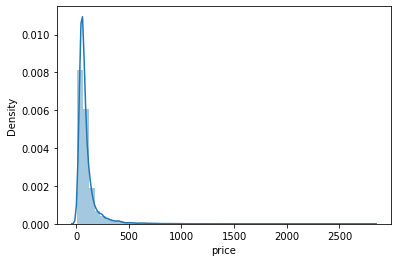

In [60]:
sns.distplot((house['price']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


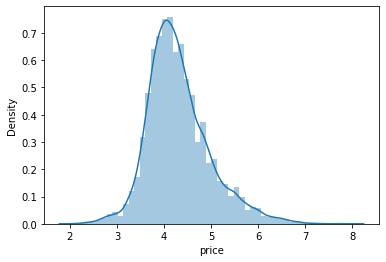

In [59]:
sns.distplot(np.log(house['price']))

>> **area_type**

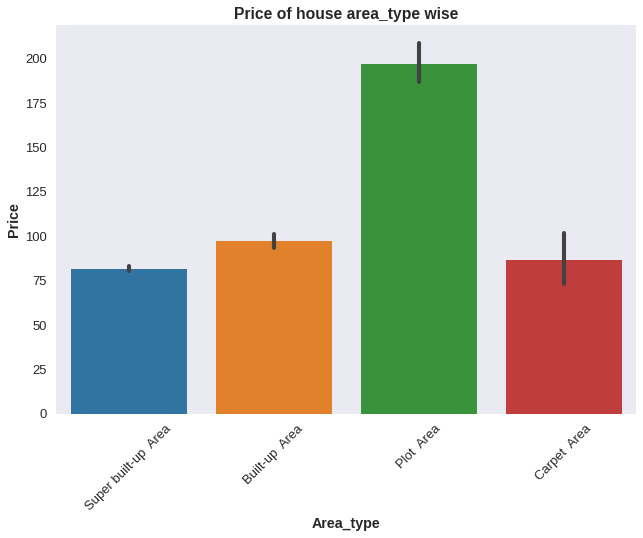

In [90]:
sns.barplot(x=house['area_type'],y=house['price'])
plt.xlabel("Area_type",fontweight='bold')
plt.ylabel("Price",fontweight='bold')
plt.title("Price of house area_type wise",fontweight='bold')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Piechart area_type')

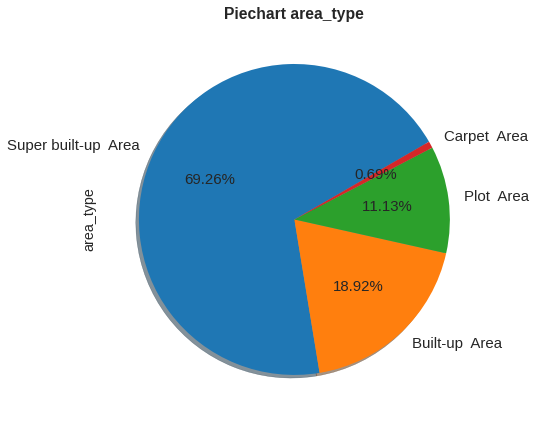

In [106]:
house['area_type'].value_counts().plot.pie(autopct="%1.2f%%",shadow=True,fontsize=15,startangle=30)
plt.title("Piechart area_type",fontweight="bold")

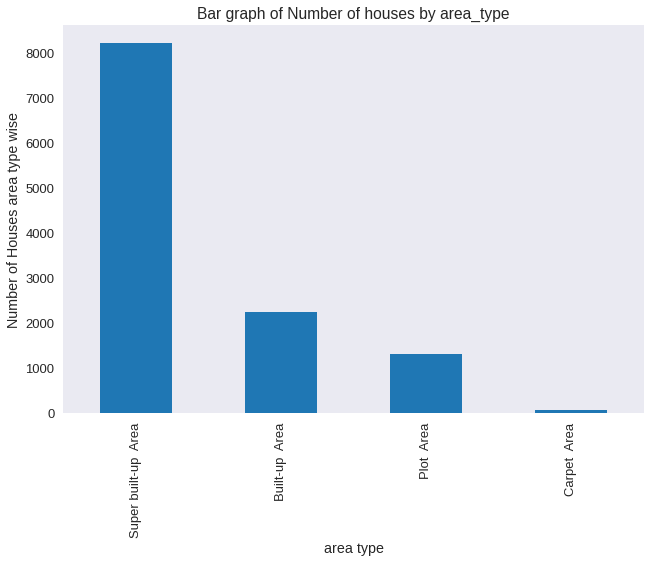

In [101]:
house["area_type"].value_counts().plot.bar()
plt.xlabel("area type")
plt.ylabel("Number of Houses area type wise")
plt.title("Bar graph of Number of houses by area_type")
plt.show()

>> **availability**

In [66]:
house.availability.value_counts()

Ready To Move                 9388
availability_count_90_100      274
18-May                         271
18-Dec                         269
18-Apr                         246
availability_count_10_20       199
18-Aug                         197
19-Dec                         172
availability_count_less_10     144
availability_count_30_40       136
18-Jul                         131
availability_count_40_50       122
18-Mar                         109
availability_count_20_30        86
availability_count_80_90        80
availability_count_60_70        49
Name: availability, dtype: int64

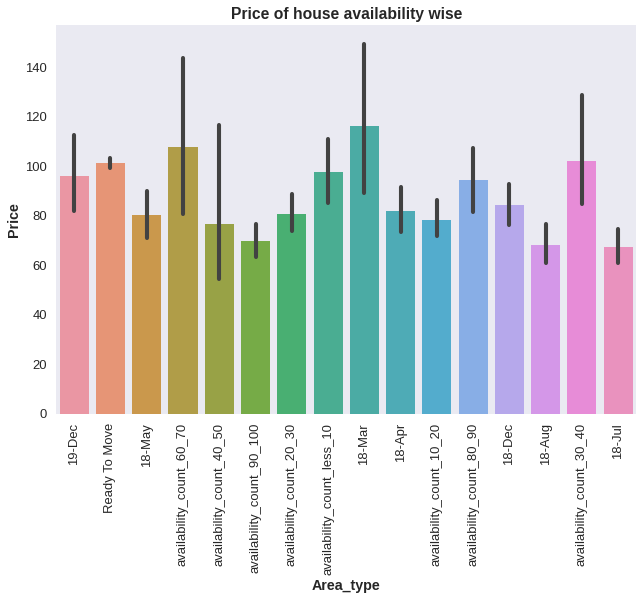

In [103]:
sns.barplot(x=house['availability'],y=house['price'])
plt.xlabel("Area_type",fontweight='bold')
plt.ylabel("Price",fontweight='bold')
plt.title("Price of house availability wise",fontweight='bold')
plt.xticks(rotation=90)
plt.show()

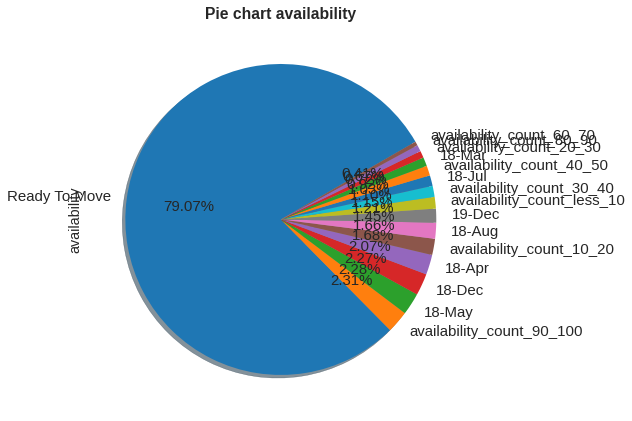

In [105]:
house['availability'].value_counts().plot.pie(autopct="%1.2f%%",shadow=True,fontsize=15,startangle=30)
plt.title("Pie chart availability",fontweight="bold")
plt.show()

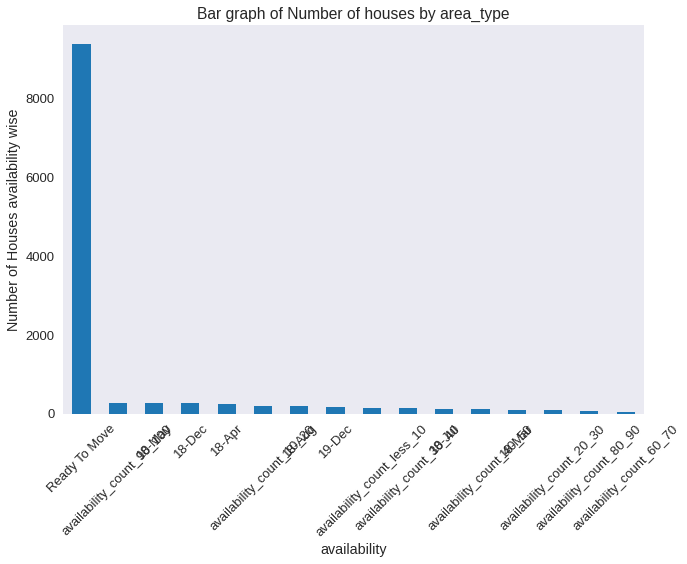

In [108]:
house["availability"].value_counts().plot.bar()
plt.xlabel("availability")
plt.ylabel("Number of Houses availability wise")
plt.title("Bar graph of Number of houses by area_type")
plt.show()

>> **total_sqft**

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.,  8000.,  9000.]), <a list of 11 Text major ticklabel objects>)

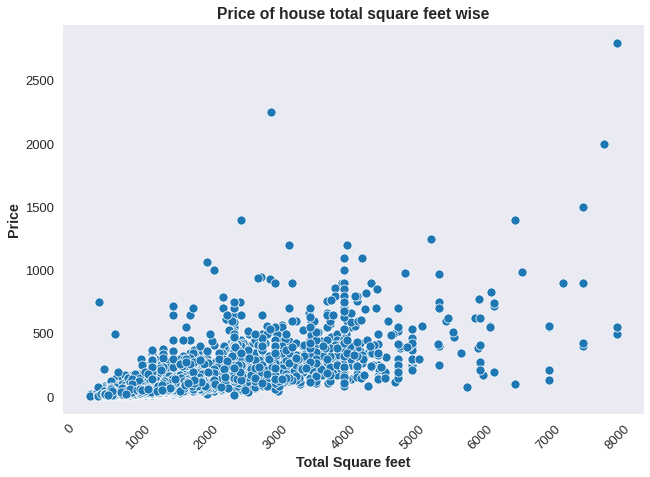

In [85]:
sns.scatterplot(x=house['total_sqft'],y=house['price'])
plt.xlabel("Total Square feet",fontweight='bold')
plt.ylabel("Price",fontweight='bold')
plt.title("Price of house total square feet wise",fontweight='bold')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Histogram of Total square feet')

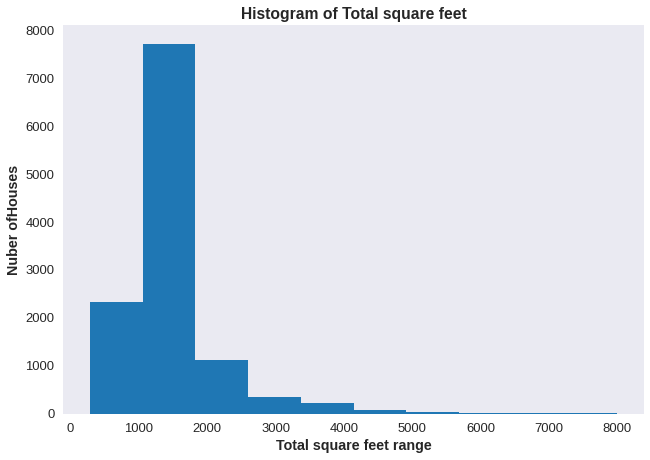

In [109]:
plt.hist(house['total_sqft'])
plt.xlabel("Total square feet range",fontweight='bold')
plt.ylabel("Nuber ofHouses",fontweight='bold')
plt.title("Histogram of Total square feet",fontweight='bold')

>> **bath**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

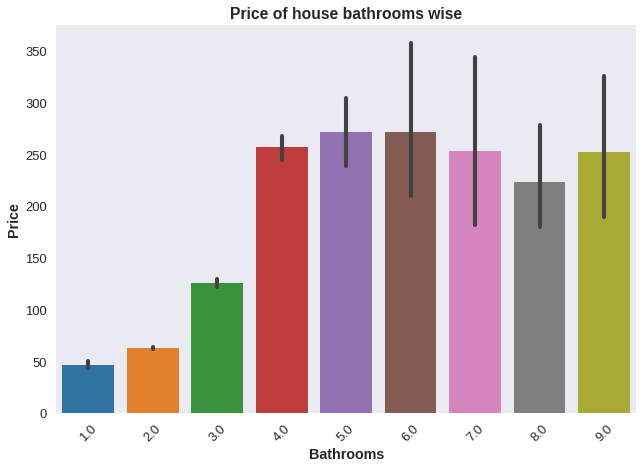

In [87]:
sns.barplot(x=house['bath'],y=house['price'])
plt.xlabel("Bathrooms",fontweight='bold')
plt.ylabel("Price",fontweight='bold')
plt.title("Price of house bathrooms wise",fontweight='bold')
plt.xticks(rotation=45)

>> **BHK**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

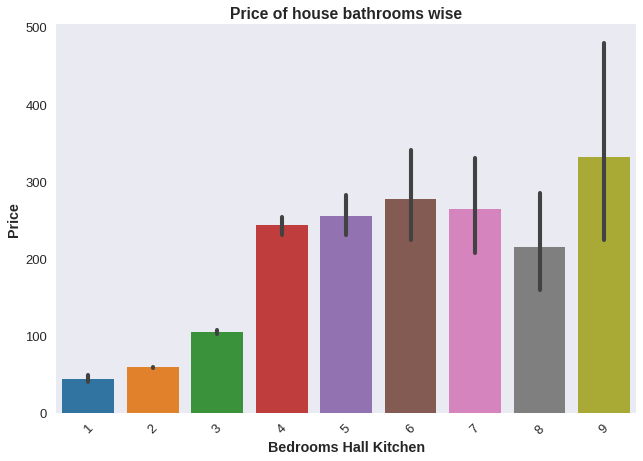

In [88]:
sns.barplot(x=house['BHK'],y=house['price'])
plt.xlabel("Bedrooms Hall Kitchen",fontweight='bold')
plt.ylabel("Price",fontweight='bold')
plt.title("Price of house bathrooms wise",fontweight='bold')
plt.xticks(rotation=45)

# **4. Model Building**

In [113]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11873 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     11873 non-null  object 
 1   availability  11873 non-null  object 
 2   location      11873 non-null  object 
 3   total_sqft    11873 non-null  float64
 4   bath          11873 non-null  float64
 5   price         11873 non-null  float64
 6   BHK           11873 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 1.0+ MB


In [143]:
x=house.drop(columns=['price'])
y=(house['price'])

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [133]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
ohe.fit(x[['area_type','availability','location']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [134]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [135]:
column_transformed=make_column_transformer((OneHotEncoder(ohe.categories_),['area_type','availability','location']),remainder='passthrough')

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

>> **Linear Regression**

In [137]:
lr=LinearRegression()

In [144]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [145]:
pipe=make_pipeline(column_transformed,lr)

In [146]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Built-up  Area', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'], dtype=object),
                                                                            array(['18-Apr', '18-Aug', '18-Dec', '18-Jul', '18-Mar', '18-May',
       '1...
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur'], dtype=object)],
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
     

In [147]:
y_pred_linear=pipe.predict(x_test)

In [148]:
r2_score(y_test,y_pred_linear)

0.5892613098520525

>> **Ridge Regression**

In [149]:
lasso=Lasso()

In [150]:
pipe=make_pipeline(column_transformed,lasso)

In [151]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Built-up  Area', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'], dtype=object),
                                                                            array(['18-Apr', '18-Aug', '18-Dec', '18-Jul', '18-Mar', '18-May',
       '1...
       'Yeshwanthpur'], dtype=object)],
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                  

In [152]:
y_pred_lasso=pipe.predict(x_test)

In [154]:
r2_score(y_test,y_pred_lasso)

0.5337668501336152

>> **Ridge Regression**

In [155]:
ridge=Ridge()

In [156]:
pipe=make_pipeline(column_transformed,ridge)

In [157]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Built-up  Area', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'], dtype=object),
                                                                            array(['18-Apr', '18-Aug', '18-Dec', '18-Jul', '18-Mar', '18-May',
       '1...
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur'], dtype=object)],
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                               

In [158]:
y_pred_ridge=pipe.predict(x_test)

In [159]:
r2_score(y_test,y_pred_ridge)

0.48291745862227864

The accuracy is very low in these models, let's improve the model

# **5. Model Improvement**

>> **Linear Regression**

In [160]:
x=house.drop(columns=['price'])
y=np.log(house['price'])

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [162]:
pipe=make_pipeline(column_transformed,lr)

In [163]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Built-up  Area', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'], dtype=object),
                                                                            array(['18-Apr', '18-Aug', '18-Dec', '18-Jul', '18-Mar', '18-May',
       '1...
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur'], dtype=object)],
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
     

In [164]:
y_pred_linear_log=pipe.predict(x_test)

In [165]:
r2_score(y_test,y_pred_linear_log)

0.7333100801953232

>> **Lasso Regression**

In [166]:
pipe=make_pipeline(column_transformed,lasso)

In [167]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Built-up  Area', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'], dtype=object),
                                                                            array(['18-Apr', '18-Aug', '18-Dec', '18-Jul', '18-Mar', '18-May',
       '1...
       'Yeshwanthpur'], dtype=object)],
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                  

In [168]:
y_pred_lasso_log=pipe.predict(x_test)

In [169]:
r2_score(y_test,y_pred_lasso_log)

0.5275799908966754

>> **Ridge Regression**

In [170]:
pipe=make_pipeline(column_transformed,ridge)

In [171]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Built-up  Area', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'], dtype=object),
                                                                            array(['18-Apr', '18-Aug', '18-Dec', '18-Jul', '18-Mar', '18-May',
       '1...
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur'], dtype=object)],
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                               

In [172]:
y_pred_ridge_log=pipe.predict(x_test)

In [173]:
r2_score(y_test,y_pred_ridge_log)

0.5273881002803873

In [181]:
print("Linear Regression Original Score : ",r2_score(y_test,y_pred_linear))
print("Lasso Regression Original Score : ",r2_score(y_test,y_pred_lasso))
print("Ridge Regression Original Score : ",r2_score(y_test,y_pred_ridge))
print("-------------------------------------------------------------------------------------")
print("Linear Regression Score after taking log of the target variable : ",r2_score(y_test,y_pred_linear_log))
print("Lasso Regression Score after taking log of the target variable : ",r2_score(y_test,y_pred_lasso_log))
print("Ridge Regression Score after taking log of the target variable : ",r2_score(y_test,y_pred_ridge_log))

Linear Regression Original Score :  -35874.562115667286
Lasso Regression Original Score :  -34379.94772937556
Ridge Regression Original Score :  -33194.838618319955
-------------------------------------------------------------------------------------
Linear Regression Score after taking log of the target variable :  0.7333100801953232
Lasso Regression Score after taking log of the target variable :  0.5275799908966754
Ridge Regression Score after taking log of the target variable :  0.5273881002803873


**Therefore our selected model is the Linear Regression model where we take target as the log of the price.**

In [182]:
import pickle

In [183]:
pickle.dump(pipe,open('LinearModel.pk1','wb'))